<a href="https://colab.research.google.com/github/adtitovich/dsml-17/blob/main/m1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import scipy.stats
import matplotlib.pyplot as plt

Проверьте данные на пропуски. Удалите в случае обнаружения. *Предложите альтернативный способ работы с пропусками

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/adtitovich/dsml-17/main/datasets/adult.csv') # датасет - https://www.cs.toronto.edu/~delve/data/adult/desc.html
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data = data.replace(['?'], np.nan).dropna()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


Постройте 1-2 графика на выбор.

<Axes: xlabel='race'>

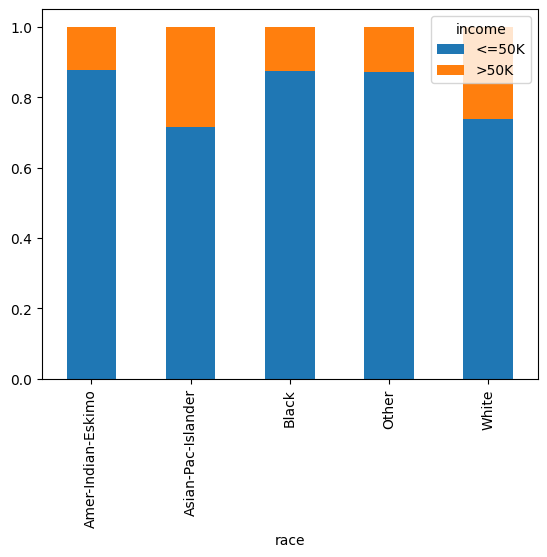

In [26]:
cat_totals = data.groupby(["race","income"])["income"].count().unstack()
pct_df1 = cat_totals.divide(cat_totals.sum(axis=1), axis=0)
pct_df1.plot(kind="bar", stacked=True)

<Axes: xlabel='gender'>

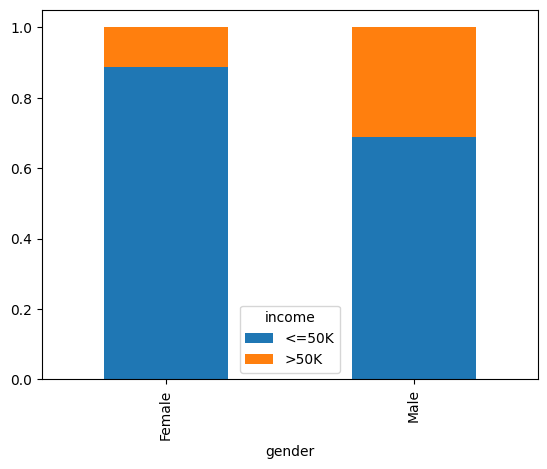

In [23]:
cat_totals1 = dt.groupby(["gender","income"])["income"].count().unstack()
pct_df = cat_totals1.divide(cat_totals1.sum(axis=1), axis=0)
pct_df.plot(kind="bar", stacked=True)


<Axes: xlabel='native-country'>

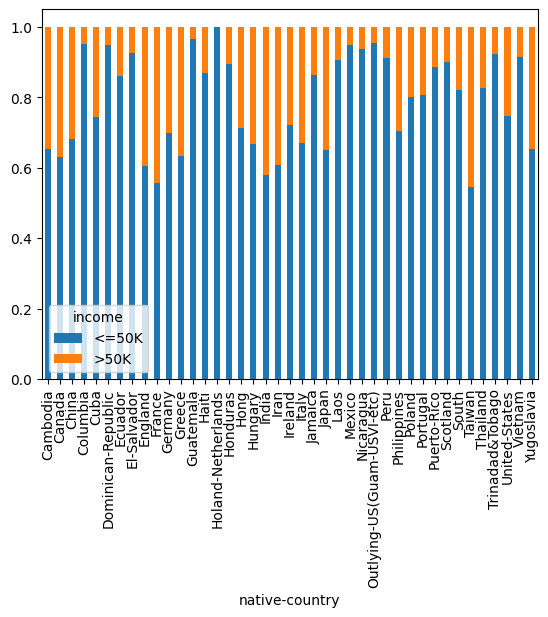

In [28]:
cat_totals2 = dt.groupby(["native-country","income"])["income"].count().unstack()
pct_df2 = cat_totals2.divide(cat_totals2.sum(axis=1), axis=0)
pct_df2.plot(kind="bar", stacked=True)

Преобразуйте категориальные признаки.

In [29]:
selectedColumns = data [['age', 'workclass', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]

X = pd.get_dummies (selectedColumns, columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])

In [ ]:
X.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


записываем в таргетную переменную y преобразованный столбец income

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit( data['income'])

y = pd.Series (data = le.transform(data['income']))

Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [ ]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей.

In [ ]:
model.score(X_train, y_train) 

0.8485778256903558

In [ ]:
model.score(X_test,y_test)

0.845992260917634

Метод опорных векторов. SVM.

In [34]:
from sklearn.svm import SVC
# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [35]:
clf.score(X_train, y_train) 

0.858805318296155

In [36]:
clf.score(X_test, y_test)

0.8468767274737424

In [37]:
clf2 = make_pipeline(StandardScaler(), SVC(kernel = 'sigmoid', degree=3)) 
clf2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='sigmoid'))])

In [38]:
clf2.score(X_train, y_train) 

0.8111783729994195

In [ ]:
clf.score(X_test, y_test)